In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV,ElasticNet,ElasticNetCV,LinearRegression
from sklearn.model_selection import train_test_split
sns.set()
import pylab


In [2]:
df=pd.read_csv("C:/Users/yashw/Downloads/Admission_Prediction.csv")

In [3]:
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,2,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,3,NaN,104.0,3.0,3.0,3.5,8.00,1,0.72
3,4,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,5,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332.0,108.0,5.0,4.5,4.0,9.02,1,0.87
496,497,337.0,117.0,5.0,5.0,5.0,9.87,1,0.96
497,498,330.0,120.0,5.0,4.5,5.0,9.56,1,0.93
498,499,312.0,103.0,4.0,4.0,5.0,8.43,0,0.73


In [4]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,485.000000,490.000000,485.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.558763,107.187755,3.121649,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.274704,6.112899,1.146160,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          485 non-null    float64
 2   TOEFL Score        490 non-null    float64
 3   University Rating  485 non-null    float64
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 35.3 KB


In [6]:
df.isnull().sum()

Serial No.            0
GRE Score            15
TOEFL Score          10
University Rating    15
SOP                   0
LOR                   0
CGPA                  0
Research              0
Chance of Admit       0
dtype: int64

In [7]:
df.corr()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,1.000000,-0.098792,-0.140218,-0.050560,-0.137352,-0.003694,-0.074289,-0.005332,0.008505
GRE Score,-0.098792,1.000000,0.835273,0.638159,0.616434,0.531996,0.829391,0.553755,0.810817
TOEFL Score,-0.140218,0.835273,1.000000,0.655072,0.647666,0.541949,0.810473,0.469540,0.792369
University Rating,-0.050560,0.638159,0.655072,1.000000,0.723497,0.611437,0.706012,0.431253,0.690195
SOP,-0.137352,0.616434,0.647666,0.723497,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,-0.003694,0.531996,0.541949,0.611437,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,-0.074289,0.829391,0.810473,0.706012,0.712154,0.637469,1.000000,0.501311,0.882413
Research,-0.005332,0.553755,0.469540,0.431253,0.408116,0.372526,0.501311,1.000000,0.545871
Chance of Admit,0.008505,0.810817,0.792369,0.690195,0.684137,0.645365,0.882413,0.545871,1.000000


<AxesSubplot:>

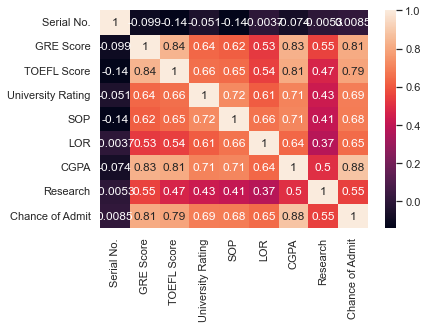

In [8]:
sns.heatmap(df.corr(),annot=True)

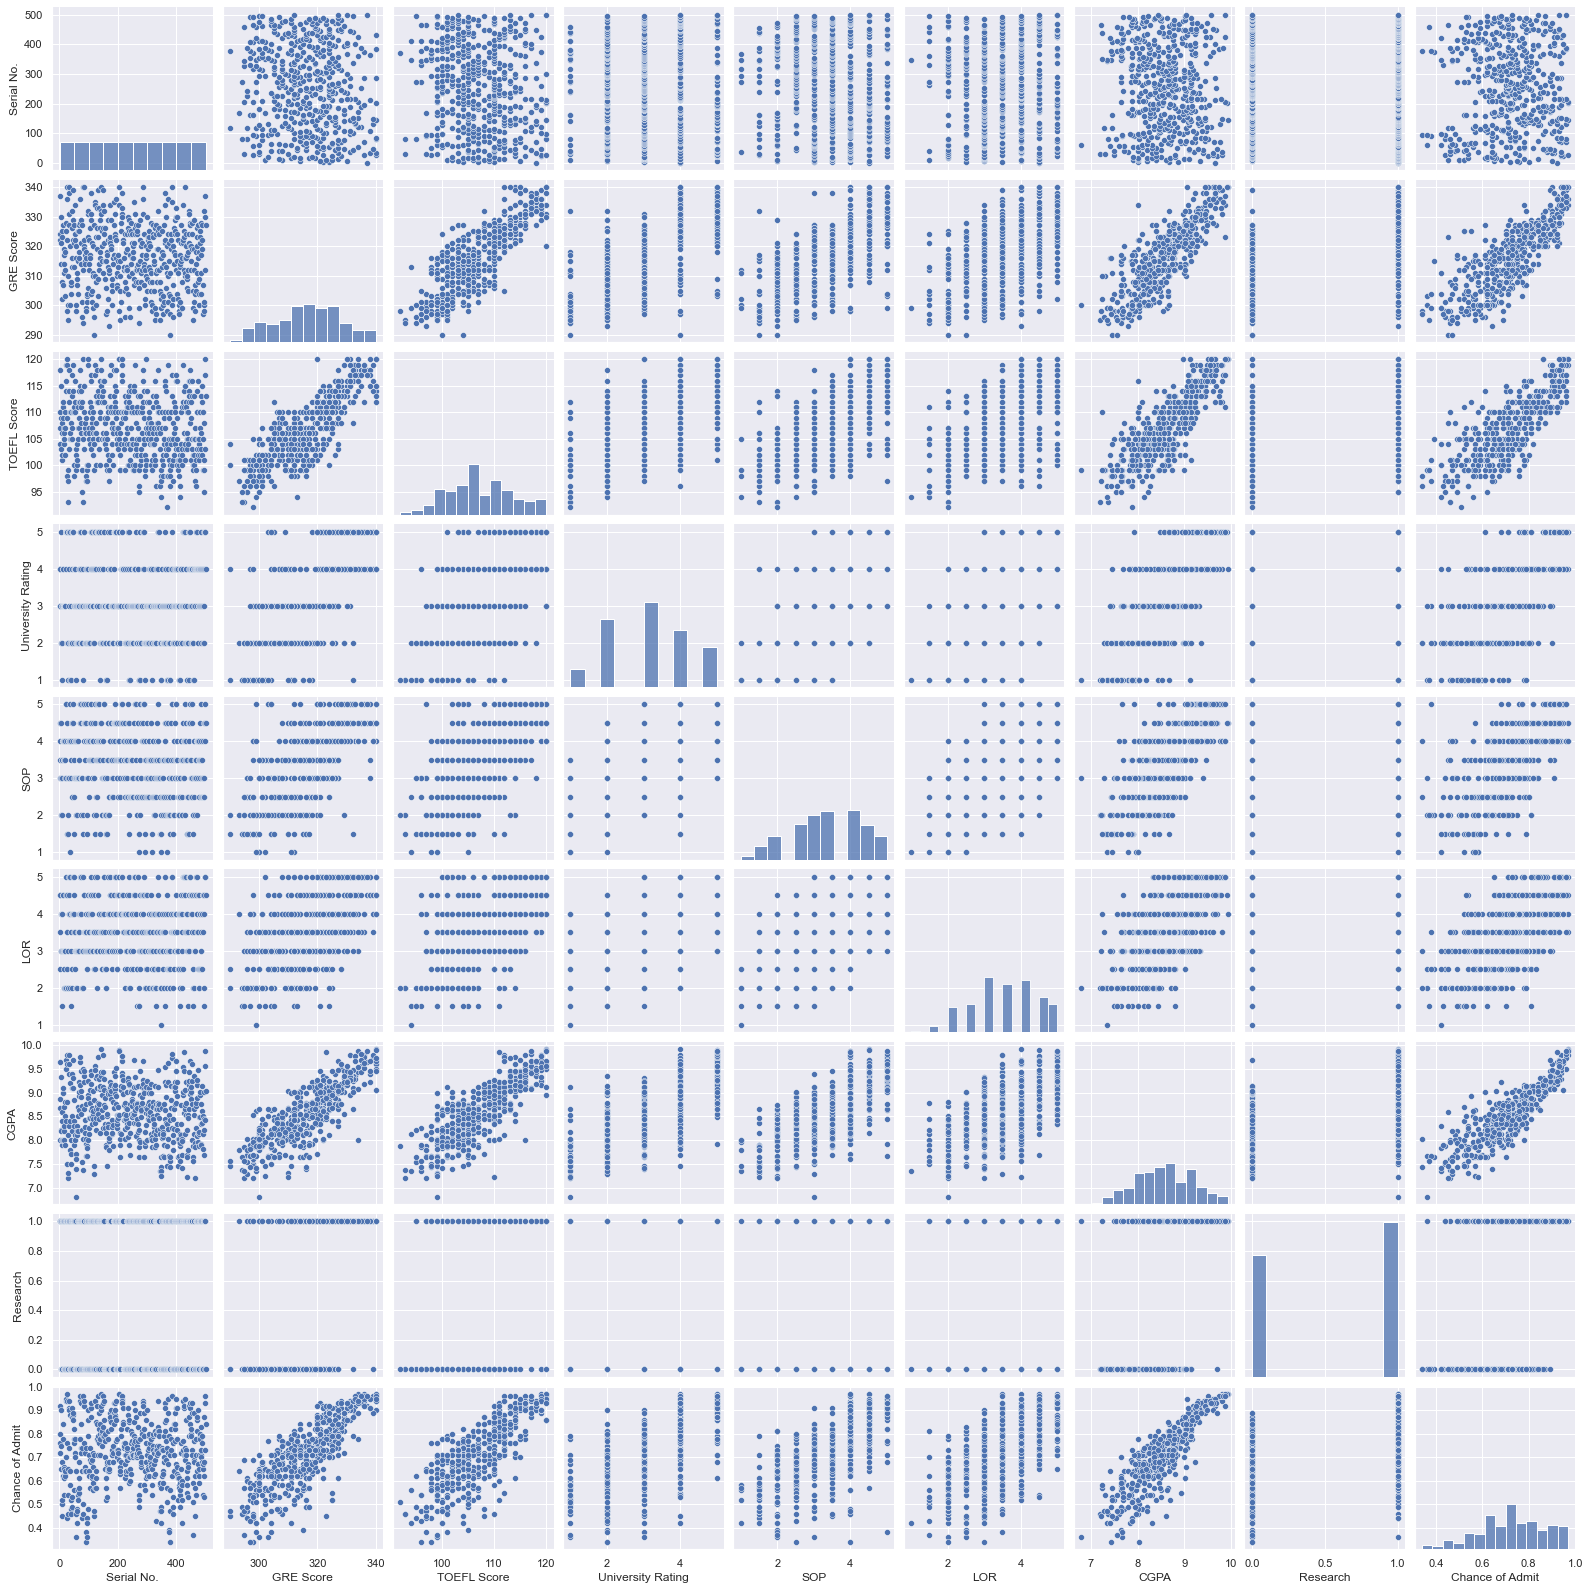

In [9]:
sns.pairplot(df)

In [10]:
df['GRE Score']=df['GRE Score'].fillna(df['GRE Score'].median())

In [11]:
df['TOEFL Score']=df['TOEFL Score'].fillna(df['TOEFL Score'].median())

In [12]:
df['University Rating']=df['University Rating'].fillna(df['University Rating'].median())

In [13]:
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,2,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,3,317.0,104.0,3.0,3.0,3.5,8.00,1,0.72
3,4,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,5,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332.0,108.0,5.0,4.5,4.0,9.02,1,0.87
496,497,337.0,117.0,5.0,5.0,5.0,9.87,1,0.96
497,498,330.0,120.0,5.0,4.5,5.0,9.56,1,0.93
498,499,312.0,103.0,4.0,4.0,5.0,8.43,0,0.73


<AxesSubplot:xlabel='GRE Score', ylabel='Chance of Admit'>

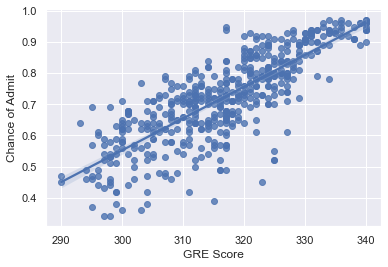

In [14]:
sns.regplot(x='GRE Score',y='Chance of Admit',data=df)

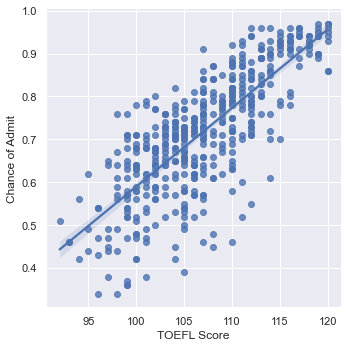

In [15]:
sns.lmplot(x='TOEFL Score',y='Chance of Admit',data=df)

((array([-2.99209858e+00, -2.71015927e+00, -2.55162541e+00, -2.43921385e+00,
         -2.35113311e+00, -2.27822091e+00, -2.21572267e+00, -2.16084152e+00,
         -2.11178767e+00, -2.06734403e+00, -2.02664403e+00, -1.98904794e+00,
         -1.95406954e+00, -1.92133033e+00, -1.89052965e+00, -1.86142459e+00,
         -1.83381593e+00, -1.80753820e+00, -1.78245240e+00, -1.75844061e+00,
         -1.73540186e+00, -1.71324904e+00, -1.69190643e+00, -1.67130780e+00,
         -1.65139483e+00, -1.63211595e+00, -1.61342528e+00, -1.59528183e+00,
         -1.57764883e+00, -1.56049314e+00, -1.54378481e+00, -1.52749667e+00,
         -1.51160399e+00, -1.49608418e+00, -1.48091659e+00, -1.46608224e+00,
         -1.45156367e+00, -1.43734479e+00, -1.42341071e+00, -1.40974764e+00,
         -1.39634279e+00, -1.38318426e+00, -1.37026095e+00, -1.35756253e+00,
         -1.34507932e+00, -1.33280226e+00, -1.32072287e+00, -1.30883317e+00,
         -1.29712567e+00, -1.28559331e+00, -1.27422944e+00, -1.26302778e+00,

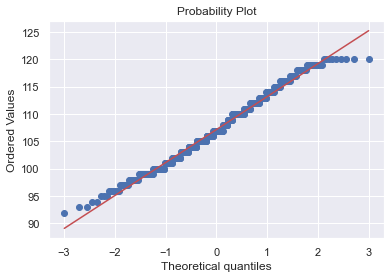

In [16]:
stats.probplot(df['TOEFL Score'],dist='norm',plot=pylab)

((array([-2.99209858e+00, -2.71015927e+00, -2.55162541e+00, -2.43921385e+00,
         -2.35113311e+00, -2.27822091e+00, -2.21572267e+00, -2.16084152e+00,
         -2.11178767e+00, -2.06734403e+00, -2.02664403e+00, -1.98904794e+00,
         -1.95406954e+00, -1.92133033e+00, -1.89052965e+00, -1.86142459e+00,
         -1.83381593e+00, -1.80753820e+00, -1.78245240e+00, -1.75844061e+00,
         -1.73540186e+00, -1.71324904e+00, -1.69190643e+00, -1.67130780e+00,
         -1.65139483e+00, -1.63211595e+00, -1.61342528e+00, -1.59528183e+00,
         -1.57764883e+00, -1.56049314e+00, -1.54378481e+00, -1.52749667e+00,
         -1.51160399e+00, -1.49608418e+00, -1.48091659e+00, -1.46608224e+00,
         -1.45156367e+00, -1.43734479e+00, -1.42341071e+00, -1.40974764e+00,
         -1.39634279e+00, -1.38318426e+00, -1.37026095e+00, -1.35756253e+00,
         -1.34507932e+00, -1.33280226e+00, -1.32072287e+00, -1.30883317e+00,
         -1.29712567e+00, -1.28559331e+00, -1.27422944e+00, -1.26302778e+00,

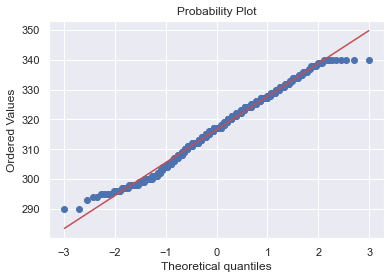

In [17]:
stats.probplot(df['GRE Score'],dist='norm',plot=pylab)

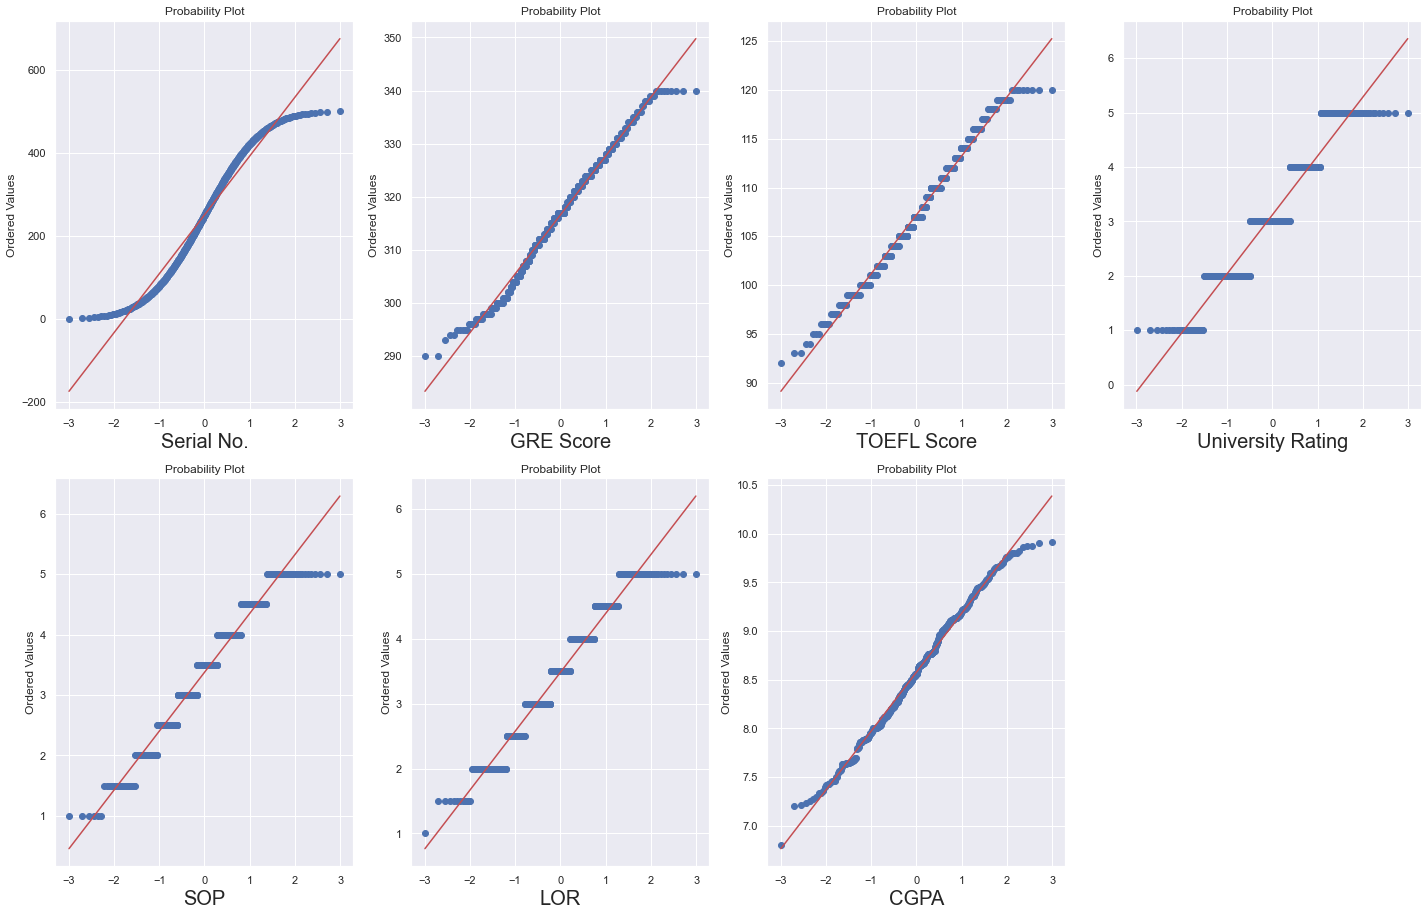

In [18]:
plt.figure(figsize=(20,25),facecolor='white')
a=1
for i in df:
    if(a<=7):
        ax=plt.subplot(4,4,a)
        stats.probplot(df[i],dist='norm',plot=pylab)        
        plt.xlabel(i,fontsize=20)
    a=a+1
plt.tight_layout()    
        

In [19]:
df.skew(axis=0)

Serial No.           0.000000
GRE Score           -0.056060
TOEFL Score          0.104963
University Rating    0.102097
SOP                 -0.228972
LOR                 -0.145290
CGPA                -0.026613
Research            -0.242475
Chance of Admit     -0.289966
dtype: float64

In [20]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR', 'CGPA', 'Research', 'Chance of Admit'],
      dtype='object')

In [21]:
df['Research'].value_counts()

1    280
0    220
Name: Research, dtype: int64

In [22]:
df.groupby(['Research'])['Chance of Admit'].value_counts()

Research  Chance of Admit
0         0.71               14
          0.64               13
          0.72               10
          0.62                9
          0.65                9
                             ..
1         0.66                2
          0.36                1
          0.46                1
          0.50                1
          0.54                1
Name: Chance of Admit, Length: 99, dtype: int64

In [23]:
df.groupby(['Research'])['Chance of Admit'].agg(['max','min'])

,max,min
Research,,
0,0.89,0.34
1,0.97,0.36


In [24]:
a=stats.boxcox(df['SOP'])
a=a[0]

((array([-2.99209858e+00, -2.71015927e+00, -2.55162541e+00, -2.43921385e+00,
         -2.35113311e+00, -2.27822091e+00, -2.21572267e+00, -2.16084152e+00,
         -2.11178767e+00, -2.06734403e+00, -2.02664403e+00, -1.98904794e+00,
         -1.95406954e+00, -1.92133033e+00, -1.89052965e+00, -1.86142459e+00,
         -1.83381593e+00, -1.80753820e+00, -1.78245240e+00, -1.75844061e+00,
         -1.73540186e+00, -1.71324904e+00, -1.69190643e+00, -1.67130780e+00,
         -1.65139483e+00, -1.63211595e+00, -1.61342528e+00, -1.59528183e+00,
         -1.57764883e+00, -1.56049314e+00, -1.54378481e+00, -1.52749667e+00,
         -1.51160399e+00, -1.49608418e+00, -1.48091659e+00, -1.46608224e+00,
         -1.45156367e+00, -1.43734479e+00, -1.42341071e+00, -1.40974764e+00,
         -1.39634279e+00, -1.38318426e+00, -1.37026095e+00, -1.35756253e+00,
         -1.34507932e+00, -1.33280226e+00, -1.32072287e+00, -1.30883317e+00,
         -1.29712567e+00, -1.28559331e+00, -1.27422944e+00, -1.26302778e+00,

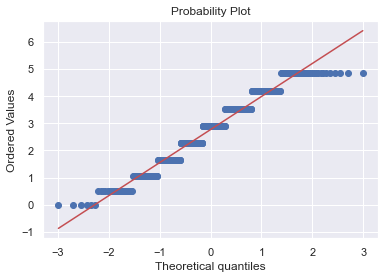

In [25]:
stats.probplot(a,dist='norm',plot=pylab)

C:\Users\yashw\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

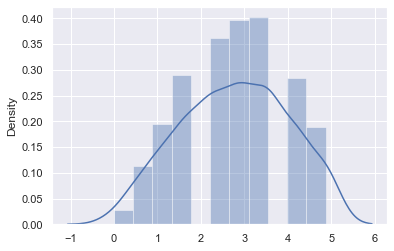

In [26]:
sns.distplot(a)

C:\Users\yashw\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LOR', ylabel='Density'>

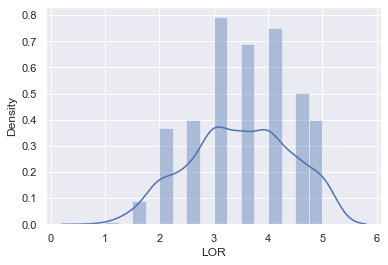

In [29]:
sns.distplot(df['LOR'])

In [30]:
stats.skew(a)

-0.11444197659043719

In [31]:
x=np.log(df['SOP'])
stats.skew(x)

-0.9752679783078937

In [32]:
a

array([4.1970795 , 3.53775062, 2.26771497, 2.89403227, 1.07743818,
       4.1970795 , 2.26771497, 2.26771497, 1.07743818, 2.89403227,
       2.89403227, 3.53775062, 3.53775062, 3.53775062, 2.89403227,
       2.89403227, 3.53775062, 3.53775062, 3.53775062, 2.89403227,
       2.26771497, 2.26771497, 4.87059478, 4.87059478, 3.53775062,
       4.1970795 , 4.1970795 , 0.52125479, 1.07743818, 0.52125479,
       2.26771497, 3.53775062, 2.26771497, 3.53775062, 3.53775062,
       4.87059478, 3.53775062, 0.        , 2.26771497, 3.53775062,
       2.89403227, 1.66112713, 1.66112713, 4.1970795 , 4.1970795 ,
       4.87059478, 3.53775062, 4.1970795 , 2.89403227, 2.26771497,
       1.66112713, 0.52125479, 3.53775062, 3.53775062, 2.26771497,
       2.26771497, 1.07743818, 3.53775062, 2.26771497, 1.07743818,
       2.26771497, 3.53775062, 2.26771497, 3.53775062, 2.26771497,
       2.89403227, 2.26771497, 2.89403227, 2.89403227, 4.1970795 ,
       4.87059478, 4.87059478, 4.87059478, 4.1970795 , 2.26771

In [33]:
df['Sop']=pd.Series(a)

In [34]:
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,Sop
0,1,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92,4.197080
1,2,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76,3.537751
2,3,317.0,104.0,3.0,3.0,3.5,8.00,1,0.72,2.267715
3,4,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80,2.894032
4,5,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65,1.077438
...,...,...,...,...,...,...,...,...,...,...
495,496,332.0,108.0,5.0,4.5,4.0,9.02,1,0.87,4.197080
496,497,337.0,117.0,5.0,5.0,5.0,9.87,1,0.96,4.870595
497,498,330.0,120.0,5.0,4.5,5.0,9.56,1,0.93,4.197080
498,499,312.0,103.0,4.0,4.0,5.0,8.43,0,0.73,3.537751


In [35]:
df=df.drop(columns='SOP')

In [36]:
df['Sop']=df['Sop'].apply(lambda x:round(x,2))

In [37]:
b=stats.boxcox(df['LOR'])
b=b[0]

In [38]:
df['LOR']=pd.Series(b)


In [39]:
df['LOR']=df['LOR'].apply(lambda x:round(x,2))

C:\Users\yashw\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LOR', ylabel='Density'>

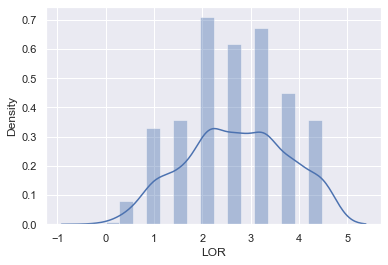

In [40]:
sns.distplot(df['LOR'])

In [41]:
df

,Serial No.,GRE Score,TOEFL Score,University Rating,LOR,CGPA,Research,Chance of Admit,Sop
0,1,337.0,118.0,4.0,3.88,9.65,1,0.92,4.20
1,2,324.0,107.0,4.0,3.88,8.87,1,0.76,3.54
2,3,317.0,104.0,3.0,2.72,8.00,1,0.72,2.27
3,4,322.0,110.0,3.0,1.59,8.67,1,0.80,2.89
4,5,314.0,103.0,2.0,2.15,8.21,0,0.65,1.08
...,...,...,...,...,...,...,...,...,...
495,496,332.0,108.0,5.0,3.29,9.02,1,0.87,4.20
496,497,337.0,117.0,5.0,4.47,9.87,1,0.96,4.87
497,498,330.0,120.0,5.0,4.47,9.56,1,0.93,4.20
498,499,312.0,103.0,4.0,4.47,8.43,0,0.73,3.54


In [42]:
df.corr()

,Serial No.,GRE Score,TOEFL Score,University Rating,LOR,CGPA,Research,Chance of Admit,Sop
Serial No.,1.000000,-0.097103,-0.139022,-0.050131,-0.002298,-0.074289,-0.005332,0.008505,-0.138825
GRE Score,-0.097103,1.000000,0.819885,0.623467,0.527835,0.818344,0.544756,0.802321,0.609825
TOEFL Score,-0.139022,0.819885,1.000000,0.644189,0.535216,0.805547,0.464858,0.786543,0.644406
University Rating,-0.050131,0.623467,0.644189,1.000000,0.608105,0.697704,0.424966,0.681482,0.716128
LOR,-0.002298,0.527835,0.535216,0.608105,1.000000,0.637979,0.372679,0.645606,0.664875
CGPA,-0.074289,0.818344,0.805547,0.697704,0.637979,1.000000,0.501311,0.882413,0.713557
Research,-0.005332,0.544756,0.464858,0.424966,0.372679,0.501311,1.000000,0.545871,0.407915
Chance of Admit,0.008505,0.802321,0.786543,0.681482,0.645606,0.882413,0.545871,1.000000,0.685965
Sop,-0.138825,0.609825,0.644406,0.716128,0.664875,0.713557,0.407915,0.685965,1.000000


<AxesSubplot:>

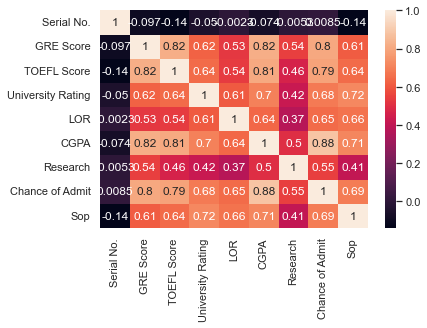

In [43]:
sns.heatmap(df.corr(),annot=True)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    float64
 2   TOEFL Score        500 non-null    float64
 3   University Rating  500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
 8   Sop                500 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 35.3 KB


In [45]:
df=df.rename(columns={'GRE Score':'GRE_Score','TOEFL Score':'TOEFL_Score','University Rating':'University_Rating','Chance of Admit':'Chance_of_Admit'})

In [46]:
df

,Serial No.,GRE_Score,TOEFL_Score,University_Rating,LOR,CGPA,Research,Chance_of_Admit,Sop
0,1,337.0,118.0,4.0,3.88,9.65,1,0.92,4.20
1,2,324.0,107.0,4.0,3.88,8.87,1,0.76,3.54
2,3,317.0,104.0,3.0,2.72,8.00,1,0.72,2.27
3,4,322.0,110.0,3.0,1.59,8.67,1,0.80,2.89
4,5,314.0,103.0,2.0,2.15,8.21,0,0.65,1.08
...,...,...,...,...,...,...,...,...,...
495,496,332.0,108.0,5.0,3.29,9.02,1,0.87,4.20
496,497,337.0,117.0,5.0,4.47,9.87,1,0.96,4.87
497,498,330.0,120.0,5.0,4.47,9.56,1,0.93,4.20
498,499,312.0,103.0,4.0,4.47,8.43,0,0.73,3.54


In [47]:
import statsmodels.formula.api as smf
lm2=smf.ols(formula='Chance_of_Admit ~ GRE_Score+TOEFL_Score',data=df).fit()
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Chance_of_Admit   R-squared:                       0.694
Model:                            OLS   Adj. R-squared:                  0.693
Method:                 Least Squares   F-statistic:                     564.3
Date:                Thu, 31 Mar 2022   Prob (F-statistic):          1.27e-128
Time:                        12:25:30   Log-Likelihood:                 566.30
No. Observations:                 500   AIC:                            -1127.
Df Residuals:                     497   BIC:                            -1114.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -2.1928      0.106    -20.747      0.000      -2.400      -1.985
GRE_Score       0.0061      0.001     11.088      0.000       0.005       0.007
TOEFL_Score     0.0092      0.001      9.066      0.000       0.007       0.011
==============================================================================
Omnibus:                       67.565   Durbin-Watson:                   0.886
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              104.237
Skew:                          -0.877   Prob(JB):                     2.32e-23
Kurtosis:                       4.389   Cond. No.                     1.01e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.01e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [48]:
df.columns

Index(['Serial No.', 'GRE_Score', 'TOEFL_Score', 'University_Rating', 'LOR',
       'CGPA', 'Research', 'Chance_of_Admit', 'Sop'],
      dtype='object')

In [49]:
df=df.drop(columns='Serial No.')

In [96]:
X=df[['GRE_Score','TOEFL_Score','University_Rating','LOR',
       'CGPA','Research','Sop']]
Y=df[['Chance_of_Admit']]

In [97]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [98]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,Y,test_size = 0.25,random_state=335)

In [99]:


from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(x_train,y_train)
# print intercept and coefficients(slope)
print(lm.intercept_)
print(lm.coef_)

[0.71965871]
[[0.01527795 0.01745261 0.00514723 0.01981818 0.06944436 0.01509728
  0.00626223]]


In [100]:
y_pred=r.predict(x_test)

In [101]:
r.score(x_test,y_test)

0.7962507818085632

In [102]:
def adj_r2(x,y):
    r2=r.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [103]:
adj_r2(x_test,y_test)

0.7840606576432636

In [104]:
r.score(x_train,y_train)

0.8248238429944923

In [105]:
adj_r2(x_train,y_train)

0.8214826083922074

In [106]:
c=mean_squared_error(y_test,y_pred)
c

0.0034448887655760957

In [107]:
rmse=np.sqrt(c)
rmse

0.05869317477847059

In [108]:
d=mean_absolute_error(y_test,y_pred)
d

0.04325191951630551

In [109]:
mape=mean_absolute_percentage_error(y_test, y_pred)
mape

0.06681407952234636